In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hiplot as hip
import pandas as pd
import pickle
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from yellowbrick.features import ParallelCoordinates
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [10]:
#Reading Input

df1 = pd.read_csv('Input_Whole.csv')

df1.rename(columns = {'TLI':'InletLiquidTemperature', 'TAI':'InletAirTemperature'
                   , 'PI':'InletPressure', 'H':'PackedBedHeight'
                   , 'D':'PackedBedDiameter', 'ML':'LiquidMassFlow'
                   , 'MA':'AirMassFlow', 'EPS':'PackedBedPorosity'}, inplace = True)

X = df1.to_numpy() #Input

#Reading Output

df2 = pd.read_csv('Output_Whole.csv')

df2.rename(columns = {'TLO':'OutletLiquidTemperature', 'TAO':'OutletAirTemperature'
                   , 'PO':'OutletPressure'}, inplace = True)

Y = df2.to_numpy() 
Y0=Y[:,0]
Y1=Y[:,1]
df3 = pd.concat([df1, df2], axis=1, join="inner")

In [11]:
n,m = X.shape
X00 = np.ones((n,1))
X01 = np.ones((n,1))
X02 = np.ones((n,1))
X03 = np.ones((n,1))
X04 = np.ones((n,1))
X05 = np.ones((n,1))
X06 = np.ones((n,1))
X07 = np.ones((n,1))
X08 = np.ones((n,1))
X09 = np.ones((n,1))
X10 = np.ones((n,1))
X11 = np.ones((n,1))
X12 = np.ones((n,1))
X13 = np.ones((n,1))
X14 = np.ones((n,1))
X15 = np.ones((n,1))
X16 = np.ones((n,1))
X17 = np.ones((n,1))
X18 = np.ones((n,1))
X19 = np.ones((n,1))
X20 = np.ones((n,1))
X21 = np.ones((n,1))
X22 = np.ones((n,1))
X23 = np.ones((n,1))
X24 = np.ones((n,1))
X25 = np.ones((n,1))
X26 = np.ones((n,1))
X27 = np.ones((n,1))
X28 = np.ones((n,1))
X29 = np.ones((n,1))
X30 = np.ones((n,1))
X31 = np.ones((n,1))
X32 = np.ones((n,1))
X33 = np.ones((n,1))
X34 = np.ones((n,1))
X35 = np.ones((n,1))
X36 = np.ones((n,1))
X37 = np.ones((n,1))
X38 = np.ones((n,1))
X39 = np.ones((n,1))
X40 = np.ones((n,1))
X41 = np.ones((n,1))
X42 = np.ones((n,1))
X43 = np.ones((n,1))

X00[:,0] = np.transpose(X[:,0]*X[:,0])
X01[:,0] = np.transpose(X[:,0]*X[:,1])
X02[:,0] = np.transpose(X[:,0]*X[:,2])
X03[:,0] = np.transpose(X[:,0]*X[:,3])
X04[:,0] = np.transpose(X[:,0]*X[:,4])
X05[:,0] = np.transpose(X[:,0]*X[:,5])
X06[:,0] = np.transpose(X[:,0]*X[:,6])
X07[:,0] = np.transpose(X[:,0]*X[:,7])
X08[:,0] = np.transpose(X[:,1]*X[:,1])
X09[:,0] = np.transpose(X[:,1]*X[:,2])
X10[:,0] = np.transpose(X[:,1]*X[:,3])
X11[:,0] = np.transpose(X[:,1]*X[:,4])
X12[:,0] = np.transpose(X[:,1]*X[:,5])
X13[:,0] = np.transpose(X[:,1]*X[:,6])
X14[:,0] = np.transpose(X[:,1]*X[:,7])
X15[:,0] = np.transpose(X[:,2]*X[:,2])
X16[:,0] = np.transpose(X[:,2]*X[:,3])
X17[:,0] = np.transpose(X[:,2]*X[:,4])
X18[:,0] = np.transpose(X[:,2]*X[:,5])
X19[:,0] = np.transpose(X[:,2]*X[:,6])
X20[:,0] = np.transpose(X[:,2]*X[:,7])
X21[:,0] = np.transpose(X[:,3]*X[:,3])
X22[:,0] = np.transpose(X[:,3]*X[:,4])
X23[:,0] = np.transpose(X[:,3]*X[:,5])
X24[:,0] = np.transpose(X[:,3]*X[:,6])
X25[:,0] = np.transpose(X[:,3]*X[:,7])
X26[:,0] = np.transpose(X[:,4]*X[:,4])
X27[:,0] = np.transpose(X[:,4]*X[:,5])
X28[:,0] = np.transpose(X[:,4]*X[:,6])
X29[:,0] = np.transpose(X[:,4]*X[:,7])
X30[:,0] = np.transpose(X[:,5]*X[:,5])
X31[:,0] = np.transpose(X[:,5]*X[:,6])
X32[:,0] = np.transpose(X[:,5]*X[:,7])
X33[:,0] = np.transpose(X[:,6]*X[:,6])
X34[:,0] = np.transpose(X[:,6]*X[:,7])
X35[:,0] = np.transpose(X[:,7]*X[:,7])
X36[:,0] = np.transpose(1/X[:,0])
X37[:,0] = np.transpose(1/X[:,1])
X38[:,0] = np.transpose(1/X[:,2])
X39[:,0] = np.transpose(1/X[:,3])
X40[:,0] = np.transpose(1/X[:,4])
X41[:,0] = np.transpose(1/X[:,5])
X42[:,0] = np.transpose(1/X[:,6])
X43[:,0] = np.transpose(1/X[:,7])

X = np.hstack((X,X00))
X = np.hstack((X,X01))
X = np.hstack((X,X02))
X = np.hstack((X,X03))
X = np.hstack((X,X04))
X = np.hstack((X,X05))
X = np.hstack((X,X06))
X = np.hstack((X,X07))
X = np.hstack((X,X08))
X = np.hstack((X,X09))
X = np.hstack((X,X10))
X = np.hstack((X,X11))
X = np.hstack((X,X12))
X = np.hstack((X,X13))
X = np.hstack((X,X14))
X = np.hstack((X,X15))
X = np.hstack((X,X16))
X = np.hstack((X,X17))
X = np.hstack((X,X18))
X = np.hstack((X,X19))
X = np.hstack((X,X20))
X = np.hstack((X,X21))
X = np.hstack((X,X22))
X = np.hstack((X,X23))
X = np.hstack((X,X24))
X = np.hstack((X,X25))
X = np.hstack((X,X26))
X = np.hstack((X,X27))
X = np.hstack((X,X28))
X = np.hstack((X,X29))
X = np.hstack((X,X30))
X = np.hstack((X,X31))
X = np.hstack((X,X32))
X = np.hstack((X,X33))
X = np.hstack((X,X34))
X = np.hstack((X,X35))
X = np.hstack((X,X36))
X = np.hstack((X,X37))
X = np.hstack((X,X38))
X = np.hstack((X,X39))
X = np.hstack((X,X40))
X = np.hstack((X,X41))
X = np.hstack((X,X42))
X = np.hstack((X,X43))

In [12]:
reg0 = LinearRegression().fit(X, Y0)
reg1 = LinearRegression().fit(X, Y1)
YP0=reg0.predict(X)
YP1=reg1.predict(X)

In [13]:
score0=reg0.score(X,Y0)
score1=reg1.score(X,Y1)


In [14]:
estimator = LinearRegression() #note that yow u can put options in the (...)
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X, Y0)
A0=np.array(selector.ranking_).reshape(-1,1).astype(int)



In [15]:
B0=np.linspace(0,51,52).reshape(-1,1).astype(int)
C0=np.append(B0,A0,axis=1)
D0=pd.DataFrame(C0)
X0=X
E0=C0
E0 = E0[E0[:, 1].argsort()[::-1]]
E0 = E0.astype(int)
n,m = E0.shape
RFE0=np.zeros((n-3,m+1))
RFE0[0,0]=0
RFE0[0,1]=reg0.score(X,Y0)
RFE0[0,2]=reg1.score(X,Y1)

In [16]:
D0.rename(columns = {0:'Variables', 1:'Ranking'}, inplace = True)
D0=D0.sort_values(by=['Ranking'])
D0.drop(D0[D0['Ranking'] >9].index, inplace = True)

In [17]:
for i in range (n-4):
    X0=X
    RFE0[i+1,0]=i+1
    X0=np.delete(X0, E0[0:i,0], 1)
    reg0 = LinearRegression().fit(X0, Y0)
    reg1 = LinearRegression().fit(X0, Y1)
    RFE0[i+1,1]=reg0.score(X0,Y0)
    RFE0[i+1,2]=reg1.score(X0,Y1)
    

In [18]:
RFE00=RFE0[:,0].astype(int)
RFE01=RFE0[:,1]
RFE00=pd.DataFrame(RFE00)
RFE01=pd.DataFrame(RFE01)
RFE01.rename(columns={0: 1}, inplace = True)
df_RFE=pd.concat([RFE00, RFE01], axis=1)

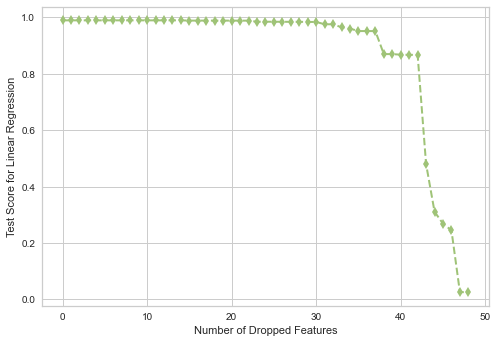

In [19]:

plt.plot(df_RFE[0], df_RFE[1], '--gd',linewidth = 2) 
ax=plt.xlabel('Number of Dropped Features')
plt.xticks(fontsize='10')
plt.ylabel('Test Score for Linear Regression')
ax.figure.savefig("RFELinear.png",dpi=600)


In [20]:
estimator = LinearRegression() #note that yow u can put options in the (...)
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X, Y1)
A1=np.array(selector.ranking_).reshape(-1,1)

In [21]:
A1
B1=np.linspace(0,51,52).reshape(-1,1)
C1=np.append(B1,A1,axis=1)
D1=pd.DataFrame(C1)
X1=X

In [22]:
m,n=X.shape

In [23]:
trainsize=0.8
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=trainsize)

In [24]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [25]:
mlp = MLPRegressor(hidden_layer_sizes=(6,3), max_iter=200000, alpha=1,
                   solver='lbfgs', verbose=0, tol=1e-5,activation = 'relu'
                  ,learning_rate_init=0.01).fit(X_train_scaled, Y_train)

KeyboardInterrupt: 

In [611]:

r = permutation_importance(mlp, X_test_scaled, Y_test,
                           n_repeats=30,
                           random_state=0)

Arr=[]

for i in c:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        Arr.append([i,r.importances_mean[i],r.importances_std[i]])

In [33]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(mlp, X_test_scaled, Y_test,
                           n_repeats=30,
                           random_state=0, scoring=scoring)
Arr_R2=[]
Arr_MAE=[]
Arr_MSE=[]

for metric in r_multi:
    if metric =='r2':
        r = r_multi[metric]
        for i in r.importances_mean.argsort()[::-1]:
            if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
                Arr_R2.append([i,r.importances_mean[i],r.importances_std[i]])
    if metric =='neg_mean_absolute_percentage_error':
        r = r_multi[metric]
        for i in r.importances_mean.argsort()[::-1]:
            if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
                Arr_MAE.append([i,r.importances_mean[i],r.importances_std[i]])
    if metric =='neg_mean_squared_error':
        r = r_multi[metric]
        for i in r.importances_mean.argsort()[::-1]:
            if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
                Arr_MSE.append([i,r.importances_mean[i],r.importances_std[i]])

In [34]:
df_R2=pd.DataFrame(Arr_R2)
df_MAE=pd.DataFrame(Arr_MAE)
df_MSE=pd.DataFrame(Arr_MSE)
df_R2_New=df_R2.sort_values(by=[1])
df_MAE_New=df_MAE.sort_values(by=[1])
df_MSE_New=df_MSE.sort_values(by=[1])

In [614]:
fake_labels = np.array(['X1'  ,'X2'  ,'X3'  ,'X4'  ,'X5'  ,'X6'  ,'X7'  ,'X8'
                       ,'X1X1','X1X2','X1X3','X1X4','X1X5','X1X6','X1X7','X1X8'
                              ,'X2X2','X2X3','X2X4','X2X5','X2X6','X2X7','X2X8'
                                     ,'X3X3','X3X4','X3X5','X3X6','X3X7','X3X8'
                                            ,'X4X4','X4X5','X4X6','X4X7','X4X8'
                                                   ,'X5X5','X5X6','X5X7','X5X8'
                                                          ,'X6X6','X6X7','X6X8'
                                                                 ,'X7X7','X7X8'
                                                                        ,'X8X8'
                       ,'1/X1','1/X2','1/X3','1/X4','1/X5','1/X6','1/X7','1/X8'])

In [615]:
df_R2_New[0] = df_R2_New[0].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,
                                    28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51],
                                    ['X1','X2','X3','X4','X5','X6','X7','X8','X1X1','X1X2','X1X3','X1X4','X1X5',
                                     'X1X6','X1X7','X1X8','X2X2','X2X3','X2X4','X2X5','X2X6','X2X7','X2X8','X3X3',
                                     'X3X4','X3X5','X3X6','X3X7','X3X8','X4X4','X4X5','X4X6','X4X7','X4X8','X5X5',
                                     'X5X6','X5X7','X5X8','X6X6','X6X7','X6X8','X7X7','X7X8','X8X8','1/X1','1/X2',
                                     '1/X3','1/X4','1/X5','1/X6','1/X7','1/X8'])
df_MAE_New[0] = df_MAE_New[0].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,
                                    28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51],
                                    ['X1','X2','X3','X4','X5','X6','X7','X8','X1X1','X1X2','X1X3','X1X4','X1X5',
                                     'X1X6','X1X7','X1X8','X2X2','X2X3','X2X4','X2X5','X2X6','X2X7','X2X8','X3X3',
                                     'X3X4','X3X5','X3X6','X3X7','X3X8','X4X4','X4X5','X4X6','X4X7','X4X8','X5X5',
                                     'X5X6','X5X7','X5X8','X6X6','X6X7','X6X8','X7X7','X7X8','X8X8','1/X1','1/X2',
                                     '1/X3','1/X4','1/X5','1/X6','1/X7','1/X8'])
df_MSE_New[0] = df_MSE_New[0].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,
                                    28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51],
                                    ['X1','X2','X3','X4','X5','X6','X7','X8','X1X1','X1X2','X1X3','X1X4','X1X5',
                                     'X1X6','X1X7','X1X8','X2X2','X2X3','X2X4','X2X5','X2X6','X2X7','X2X8','X3X3',
                                     'X3X4','X3X5','X3X6','X3X7','X3X8','X4X4','X4X5','X4X6','X4X7','X4X8','X5X5',
                                     'X5X6','X5X7','X5X8','X6X6','X6X7','X6X8','X7X7','X7X8','X8X8','1/X1','1/X2',
                                     '1/X3','1/X4','1/X5','1/X6','1/X7','1/X8'])

In [47]:
D0_New=D0
D0_New['Variables']=D0_New['Variables'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,
                                    28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51],
                                    ['X1','X2','X3','X4','X5','X6','X7','X8','X1X1','X1X2','X1X3','X1X4','X1X5',
                                     'X1X6','X1X7','X1X8','X2X2','X2X3','X2X4','X2X5','X2X6','X2X7','X2X8','X3X3',
                                     'X3X4','X3X5','X3X6','X3X7','X3X8','X4X4','X4X5','X4X6','X4X7','X4X8','X5X5',
                                     'X5X6','X5X7','X5X8','X6X6','X6X7','X6X8','X7X7','X7X8','X8X8','1/X1','1/X2',
                                     '1/X3','1/X4','1/X5','1/X6','1/X7','1/X8'])

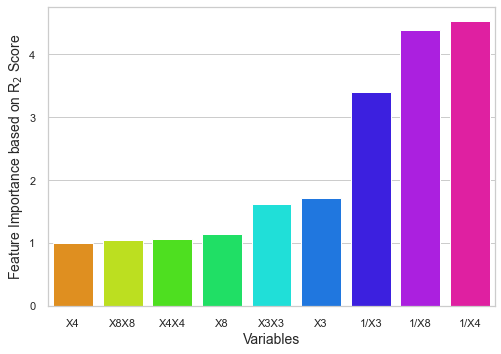

In [617]:
df_R2_New.drop(df_R2_New[df_R2_New[1] <0.8].index, inplace = True)
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=0, y=1, data=df_R2_New,palette="hsv")
plt.xlabel('Variables',fontsize='14')
plt.ylabel('Feature Importance based on R$_2$ Score',fontsize='14')
ax.figure.savefig("MLPFeatureImportanceR2.png",dpi=600)

In [58]:
D0_New['Ranking']=D0_New['Ranking'].replace([1,2,3,4,5,6,7,8,9],[9,8,7,6,5,4,3,2,1])

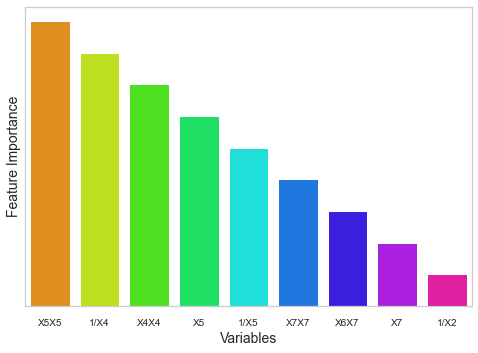

In [63]:

sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Variables', y='Ranking', data=D0_New,palette="hsv")
plt.xlabel('Variables',fontsize='14')
plt.xticks(fontsize='10')
plt.yticks([])
plt.ylabel('Feature Importance',fontsize='14')
ax.figure.savefig("LinearRanking.png",dpi=600)

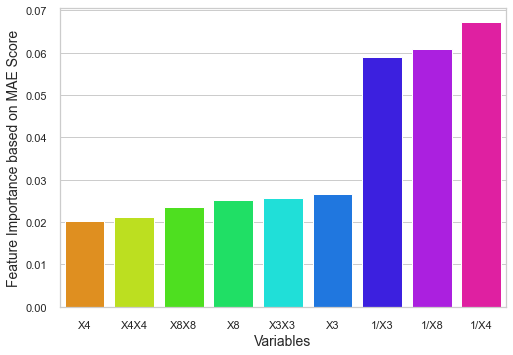

In [619]:
df_MAE_New.drop(df_MAE_New[df_MAE_New[1] <2e-02].index, inplace = True)
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=0, y=1, data=df_MAE_New,palette="hsv")
plt.xlabel('Variables',fontsize='14')
plt.ylabel('Feature Importance based on MAE Score',fontsize='14')
ax.figure.savefig("MLPFeatureImportanceMAE.png",dpi=600)

In [19]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 43)# Train the model on training data
rf.fit(X_train_scaled, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=43)

In [20]:
Y_pred=rf.predict(X_test_scaled)
rf.score(X_train_scaled,Y_train)

0.9999491599846664

In [21]:
# RFFF= rf.fit(X_train_scaled, Y_train)

In [50]:
FR=rf.feature_importances_

In [23]:
New_X_DF=pd.DataFrame(X)
New_X_DF

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,20.0,50.0,101000.0,0.5,0.15,0.020,0.001,0.8,400.0,1000.0,...,0.0008,0.64,0.050,0.020000,0.000010,2.0,6.666667,50.000000,1000.000000,1.250000
1,20.0,50.0,101000.0,0.5,0.15,0.020,0.002,0.8,400.0,1000.0,...,0.0016,0.64,0.050,0.020000,0.000010,2.0,6.666667,50.000000,500.000000,1.250000
2,20.0,50.0,101000.0,0.5,0.15,0.020,0.003,0.8,400.0,1000.0,...,0.0024,0.64,0.050,0.020000,0.000010,2.0,6.666667,50.000000,333.333333,1.250000
3,20.0,50.0,101000.0,0.5,0.15,0.020,0.004,0.8,400.0,1000.0,...,0.0032,0.64,0.050,0.020000,0.000010,2.0,6.666667,50.000000,250.000000,1.250000
4,20.0,50.0,101000.0,0.5,0.15,0.022,0.001,0.8,400.0,1000.0,...,0.0008,0.64,0.050,0.020000,0.000010,2.0,6.666667,45.454545,1000.000000,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89851,40.0,70.0,110000.0,1.0,0.35,0.040,0.004,0.9,1600.0,2800.0,...,0.0036,0.81,0.025,0.014286,0.000009,1.0,2.857143,25.000000,250.000000,1.111111
89852,40.0,70.0,110000.0,1.0,0.35,0.042,0.001,0.9,1600.0,2800.0,...,0.0009,0.81,0.025,0.014286,0.000009,1.0,2.857143,23.809524,1000.000000,1.111111
89853,40.0,70.0,110000.0,1.0,0.35,0.042,0.002,0.9,1600.0,2800.0,...,0.0018,0.81,0.025,0.014286,0.000009,1.0,2.857143,23.809524,500.000000,1.111111
89854,40.0,70.0,110000.0,1.0,0.35,0.042,0.003,0.9,1600.0,2800.0,...,0.0027,0.81,0.025,0.014286,0.000009,1.0,2.857143,23.809524,333.333333,1.111111


In [51]:
New_X_DF.rename(columns = {0:'X1',1:'X2',2:'X3',3:'X4',4:'X5',5:'X6',6:'X7',7:'X8',8:'X1X1',
                            9:'X1X2',10:'X1X3',11:'X1X4',12:'X1X5',13:'X1X6',14:'X1X7',15:'X1X8',
                            16:'X2X2',17:'X2X3',18:'X2X4',19:'X2X5',20:'X2X6',21:'X2X7',22:'X2X8',
                            23:'X3X3',24:'X3X4',25:'X3X5',26:'X3X6',27:'X3X7',28:'X3X8',29:'X4X4',
                            30:'X4X5',31:'X4X6',32:'X4X7',33:'X4X8',34:'X5X5',35:'X5X6',36:'X5X7',
                            37:'X5X8',38:'X6X6',39:'X6X7',40:'X6X8',41:'X7X7',42:'X7X8',43:'X8X8',
                            44:'1/X1',45:'1/X2',46:'1/X3',47:'1/X4',48:'1/X5',49:'1/X6',50:'1/X7',
                            51:'1/X8'}, inplace = True)
New_X_DF

,X1,X2,X3,X4,X5,X6,X7,X8,X1X1,X1X2,...,X7X8,X8X8,1/X1,1/X2,1/X3,1/X4,1/X5,1/X6,1/X7,1/X8
0,20.0,50.0,101000.0,0.5,0.15,0.020,0.001,0.8,400.0,1000.0,...,0.0008,0.64,0.050,0.020000,0.000010,2.0,6.666667,50.000000,1000.000000,1.250000
1,20.0,50.0,101000.0,0.5,0.15,0.020,0.002,0.8,400.0,1000.0,...,0.0016,0.64,0.050,0.020000,0.000010,2.0,6.666667,50.000000,500.000000,1.250000
2,20.0,50.0,101000.0,0.5,0.15,0.020,0.003,0.8,400.0,1000.0,...,0.0024,0.64,0.050,0.020000,0.000010,2.0,6.666667,50.000000,333.333333,1.250000
3,20.0,50.0,101000.0,0.5,0.15,0.020,0.004,0.8,400.0,1000.0,...,0.0032,0.64,0.050,0.020000,0.000010,2.0,6.666667,50.000000,250.000000,1.250000
4,20.0,50.0,101000.0,0.5,0.15,0.022,0.001,0.8,400.0,1000.0,...,0.0008,0.64,0.050,0.020000,0.000010,2.0,6.666667,45.454545,1000.000000,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89851,40.0,70.0,110000.0,1.0,0.35,0.040,0.004,0.9,1600.0,2800.0,...,0.0036,0.81,0.025,0.014286,0.000009,1.0,2.857143,25.000000,250.000000,1.111111
89852,40.0,70.0,110000.0,1.0,0.35,0.042,0.001,0.9,1600.0,2800.0,...,0.0009,0.81,0.025,0.014286,0.000009,1.0,2.857143,23.809524,1000.000000,1.111111
89853,40.0,70.0,110000.0,1.0,0.35,0.042,0.002,0.9,1600.0,2800.0,...,0.0018,0.81,0.025,0.014286,0.000009,1.0,2.857143,23.809524,500.000000,1.111111
89854,40.0,70.0,110000.0,1.0,0.35,0.042,0.003,0.9,1600.0,2800.0,...,0.0027,0.81,0.025,0.014286,0.000009,1.0,2.857143,23.809524,333.333333,1.111111


In [52]:
attributes = list(New_X_DF)


In [55]:
RF_Arr=sorted(zip(FR,attributes), reverse=True)
RF_Arr

[(0.8729949890638132, '1/X3'),
 (0.06699961528142406, 'X3X3'),
 (0.059999655991502254, 'X3'),
 (2.546557776121396e-06, 'X1X2'),
 (8.577174307495563e-07, 'X2X7'),
 (8.349329641020172e-07, 'X1X7'),
 (1.4771191754781232e-07, '1/X2'),
 (1.3282838297423997e-07, 'X2X2'),
 (1.2965969887612218e-07, 'X2X3'),
 (1.2568664312016301e-07, 'X2'),
 (1.2174394841570228e-07, 'X2X4'),
 (8.648610954378187e-08, 'X1X1'),
 (8.296836597585643e-08, 'X1'),
 (8.0944106764683e-08, '1/X1'),
 (7.834595595807764e-08, 'X1X3'),
 (5.762033088246965e-08, 'X6X8'),
 (4.911834600626749e-08, '1/X6'),
 (4.6547947087694275e-08, 'X1X6'),
 (4.521447450872596e-08, 'X3X6'),
 (4.4539853332747956e-08, 'X6'),
 (4.4390824732461425e-08, 'X6X6'),
 (3.9973682569886827e-08, 'X2X6'),
 (2.744529323818462e-08, 'X2X5'),
 (1.4411714752804428e-08, 'X6X7'),
 (1.397171930396832e-08, 'X1X8'),
 (1.3909652249414041e-08, 'X4X6'),
 (1.2598524664171673e-08, 'X4X5'),
 (9.256048747044227e-09, 'X4X7'),
 (8.50325825139136e-09, '1/X4'),
 (8.449172038524417

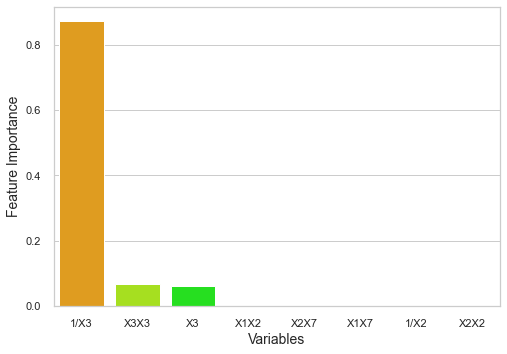

In [56]:
RF_Arr=pd.DataFrame(RF_Arr)
RF_Arr

RF_Arr.drop(RF_Arr[RF_Arr[0] <1.3e-07].index, inplace = True)
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=1, y=0, data=RF_Arr,palette="hsv")
plt.xlabel('Variables',fontsize='14')
plt.ylabel('Feature Importance',fontsize='14')
ax.figure.savefig("RFFeatureImportance.png",dpi=600)